In [68]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v1_poreC_explore/'

chromID = 'chr11'
card = 3

f1 = f'{dataDir}projMatPlots_cellLines/matrices/projMat_Int_HCC1954_Card{card}_{chromID}.pkl'
f2 = f'{dataDir}projMatPlots_cellLines/matrices/projMat_Int_HG002_Card{card}_{chromID}.pkl'
f3 = f'{dataDir}projMatPlots_cellLines/matrices/projMat_Int_GM12878_Card{card}_{chromID}.pkl'

d1 = f'{dataDir}projMatPlots_cellLines/matrices/IncDF_IntReads_HCC1954_Card{card}_{chromID}.pkl'
d2 = f'{dataDir}projMatPlots_cellLines/matrices/IncDF_IntReads_HG002_Card{card}_{chromID}.pkl'
d3 = f'{dataDir}projMatPlots_cellLines/matrices/IncDF_IntReads_GM12878_Card{card}_{chromID}.pkl'

import sys
sys.path.append('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/')
from chains import dictToDF, dfToDict
# from incidenceToProjection import makeHiC_fromInc
from edgeWeightFormulations import finalBounded, finalBounded_fromEdge

In [2]:
pm1 = pd.read_pickle(f1)
np.fill_diagonal(np.asmatrix(pm1),0)
pm2 = pd.read_pickle(f2)
np.fill_diagonal(np.asmatrix(pm2),0)
pm3 = pd.read_pickle(f3)
np.fill_diagonal(np.asmatrix(pm3),0)

In [3]:
pn1 = pm1 / np.nanmax(pm1)
pn2 = pm2 / np.nanmax(pm2)
pn3 = pm3 / np.nanmax(pm3)

In [4]:
diffMat = pn1.sub(pn3, fill_value=0)
# Extract numeric values following "Bin" in the index
numeric_values = diffMat.index.to_series().str.extract(r'Bin(\d+)', expand=False).astype(int)

# Sort the DataFrame based on numeric values
diffMat_sorted = diffMat.loc[numeric_values.sort_values().index, numeric_values.sort_values().index]

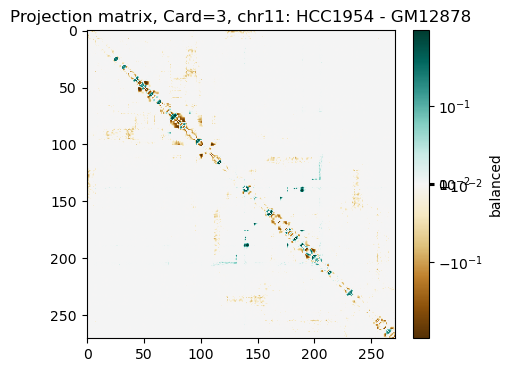

In [5]:
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from matplotlib import colors


plt.figure(figsize=(6, 4))
im = plt.imshow(diffMat_sorted, cmap="BrBG", norm=colors.SymLogNorm(linthresh=0.02, linscale=0.02,
                                              vmin=-0.5, vmax=0.5, base=10))
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title(f"Projection matrix, Card=3, {chromID}: HCC1954 - GM12878")
plt.show()

In [6]:
pm1_enr = diffMat.where(diffMat >= 0.05, 0)
pm2_enr =  diffMat.where(diffMat <= -0.05, 0)

positive_rows, positive_columns = (pm1_enr > 0).any(axis=1), (pm1_enr > 0).any()
negative_rows, negative_columns = (pm2_enr < 0).any(axis=1), (pm2_enr < 0).any()

In [7]:
id1 = pd.read_pickle(d1)
id2 = pd.read_pickle(d2)
id3 = pd.read_pickle(d3)

In [8]:
multiwayReads_pm1 = id1.loc[positive_rows].sum() > 2
enriched_pm1_incDF = id1.loc[positive_rows,multiwayReads_pm1]
print(enriched_pm1_incDF.shape)

multiwayReads_pm2 = id3.loc[negative_rows].sum() > 2
enriched_pm2_incDF = id3.loc[negative_rows,multiwayReads_pm2]
enriched_pm2_incDF.shape

(122, 1120)


(217, 2267)

In [9]:
enriched_pm1_incDF

,Read2:1,Read3:33,Read12:1,Read14:27,Read18:152,Read23:1,Read27:1,Read28:1,Read34:2,Read36:15,...,Read5255:1,Read5256:1,Read5257:1,Read5261:1,Read5266:1,Read5275:1,Read5276:1,Read5282:2,Read5294:2,Read5295:1
Bin25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bin264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bin267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
[i for i,x in enumerate(enriched_pm2_incDF['Read3344:2']) if x==1]

[158, 198, 200]

In [11]:
enriched_pm2_incDF['Read3344:2'].index[[158, 198, 200]]

Index(['Bin190', 'Bin249', 'Bin253'], dtype='object')

In [138]:
import hypernetx as hnx
import networkx as nx
import seaborn as sns

HIS_f1 = hnx.Hypergraph.from_incidence_dataframe(enriched_pm1_incDF)

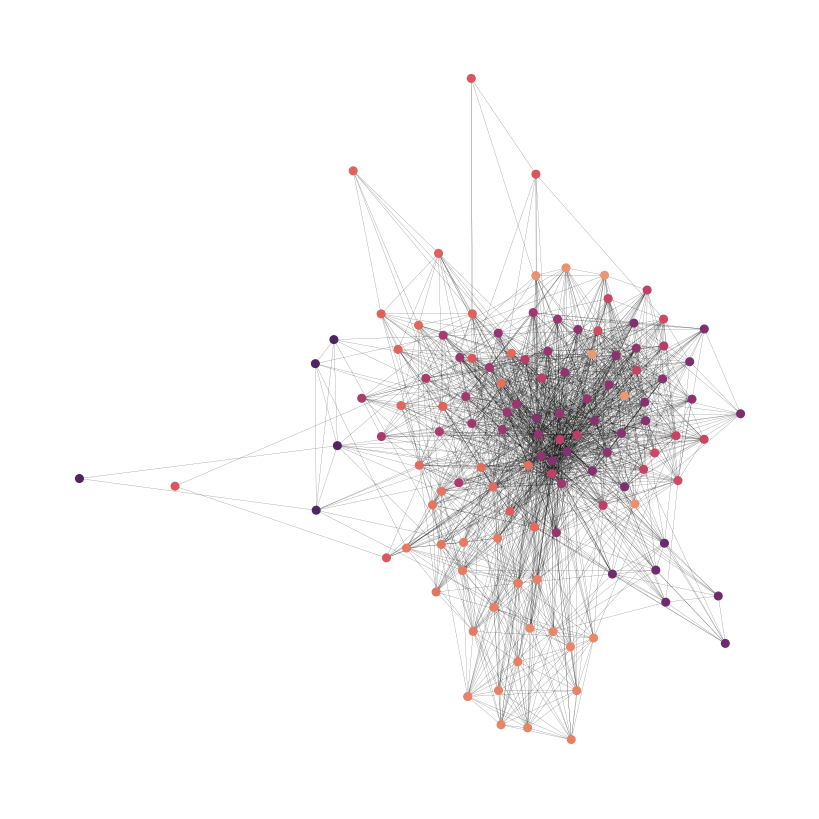

In [141]:
def sort_key(item, delimiter):
    return int(item.split(delimiter)[1])

node_names = sorted(list(list(id1.index)), key=lambda x: sort_key(x,'Bin'))
node_colors = sns.color_palette("flare", n_colors=len(node_names))
color_mapping = dict(zip(node_names, node_colors))

HIS_f1D = HIS_f1.dual()
l_f1d = HIS_f1D.get_linegraph(s = 1)
nx.draw(l_f1d,node_size = 30, 
        with_labels = False, 
        node_color=[color_mapping[node] for node in l_f1d.nodes],
        width = 0.1,
        font_size=5)

(array([262., 137., 200., 133., 155.,  71.,  57.,  65.,  23.,  17.]),
 array([0.00819672, 0.10163934, 0.19508197, 0.28852459, 0.38196721,
        0.47540984, 0.56885246, 0.66229508, 0.7557377 , 0.84918033,
        0.94262295]),
 <BarContainer object of 10 artists>)

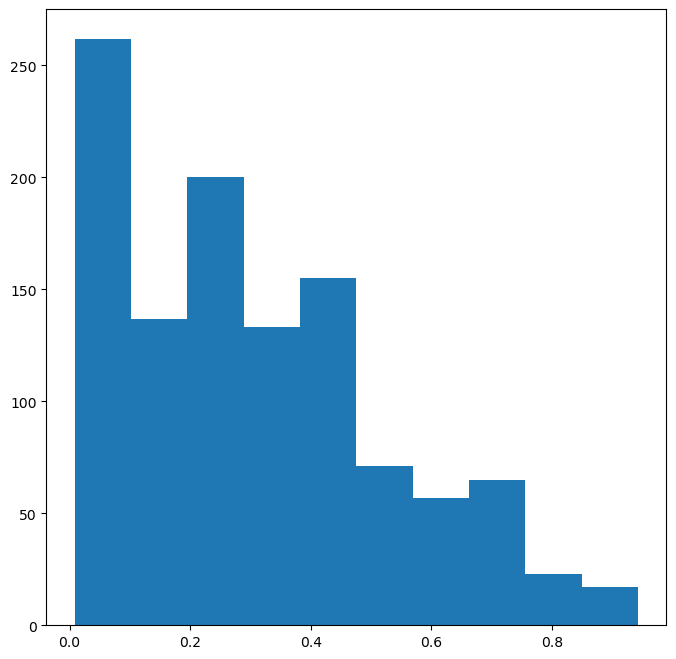

In [145]:
plt.hist(finalBoundedScores)

In [144]:
readSupport = [int(rID.split(":")[1]) for rID in enriched_pm1_incDF.columns]
finalBoundedScores = [finalBounded(list(enriched_pm1_incDF[c])) for c in enriched_pm1_incDF.columns]

node_importance = [readSupport[i]*finalBoundedScores[i] for i in range(len(readSupport))]
# node_importance = readSupport

In [146]:
import pandas as pd
import networkx as nx


df_transposed = enriched_pm1_incDF.transpose()

# Initialize a graph
G = nx.Graph()

# Iterate through each row in the transposed DataFrame
for rName, row in df_transposed.iterrows():
    # Get the nodes that are connected in this row
    connected_nodes = [column for column, value in row.items() if value == 1]
    impValue = node_importance[list(df_transposed.index).index(rName)]
    # Add edges between the connected nodes
    for i in range(len(connected_nodes)):
        for j in range(i+1, len(connected_nodes)):
            node1 = connected_nodes[i]
            node2 = connected_nodes[j]
            # Increment edge weight if edge already exists, otherwise add the edge with weight 1
            if G.has_edge(node1, node2):
                G[node1][node2]['weight'] += 1*impValue
            else:
                G.add_edge(node1, node2, weight=1*impValue)

# # Print the edges with weights
# for u, v, data in G.edges(data=True):
#     print(f"Node {u} is connected to Node {v} with weight {data['weight']}")

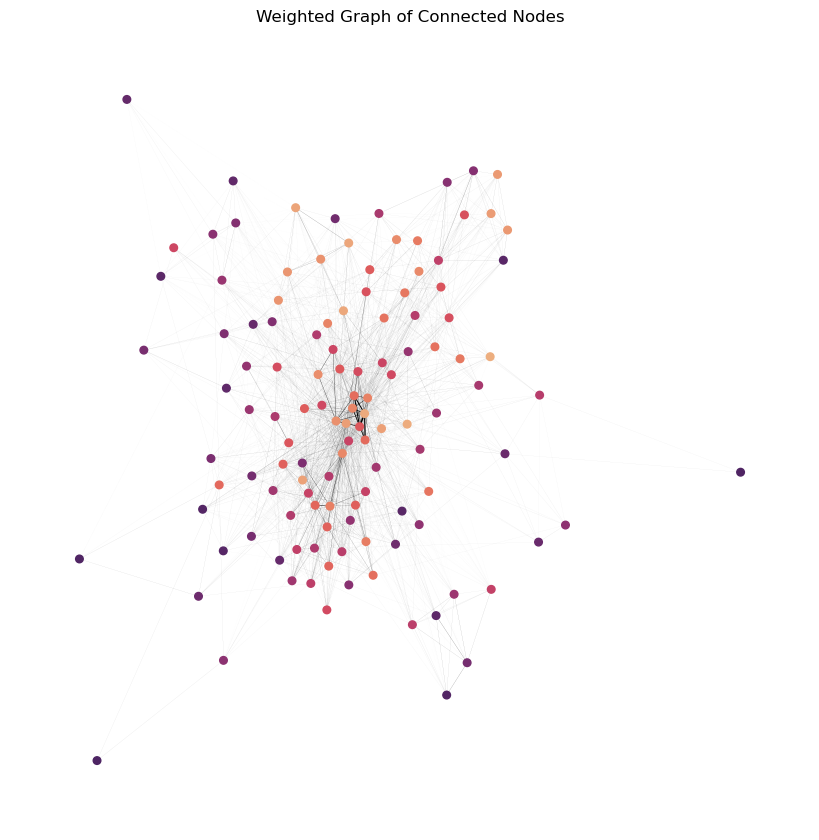

In [147]:
import matplotlib.pyplot as plt


def sort_key(item, delimiter):
    return int(item.split(delimiter)[1])

node_names = sorted(list(list(G.nodes)), key=lambda x: sort_key(x,'Bin'))
node_colors = sns.color_palette("flare", n_colors=len(node_names))
color_mapping = dict(zip(node_names, node_colors))

# Get edge weights
edge_weights = [data['weight'] for u, v, data in G.edges(data=True)]
# Normalize edge weights
min_weight = min(edge_weights)
max_weight = max(edge_weights)
normalized_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in edge_weights]

nx.draw(G,node_size = 30, 
        #with_labels = True, 
        node_color=[color_mapping[node] for node in node_names],
        width = normalized_weights,
        # pos = nx.spring_layout(G),
        font_size=5)

plt.title('Weighted Graph of Connected Nodes')
plt.show()

/gpfs/commons/home/ajoglekar/.conda/envs/noush_base/envs/hypergraph_poreC/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


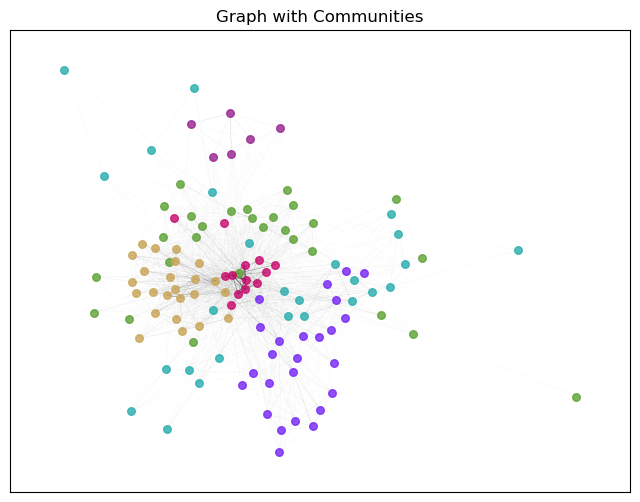

In [148]:
import networkx as nx
import community
import matplotlib.pyplot as plt
import random


# Apply the Louvain method for community detection
partition = community.best_partition(G)

# Generate random colors for each community
color_map = {}
for node, community_id in partition.items():
    if community_id not in color_map:
        color_map[community_id] = (random.random(), random.random(), random.random())  # RGB color tuple

# Plot the graph with nodes colored by community
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positions of nodes
for community_id, color in color_map.items():
    nodes_in_community = [node for node, cid in partition.items() if cid == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_community, node_color=color, node_size=30, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5,width = normalized_weights)
plt.title('Graph with Communities')
plt.show()

In [149]:
# Print the communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)


print("Communities:")
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

Communities:
Community 0: ['Bin57', 'Bin49', 'Bin50', 'Bin52', 'Bin43', 'Bin65', 'Bin60', 'Bin62', 'Bin63', 'Bin184', 'Bin56', 'Bin44', 'Bin71', 'Bin42', 'Bin58', 'Bin51', 'Bin54', 'Bin53', 'Bin55', 'Bin45', 'Bin59', 'Bin46', 'Bin47', 'Bin64', 'Bin48']
Community 5: ['Bin182', 'Bin25', 'Bin176', 'Bin148', 'Bin175', 'Bin180', 'Bin207', 'Bin265', 'Bin179', 'Bin171', 'Bin174', 'Bin186', 'Bin213', 'Bin181', 'Bin172', 'Bin26', 'Bin266', 'Bin32', 'Bin215', 'Bin149', 'Bin27', 'Bin264', 'Bin267', 'Bin34', 'Bin33', 'Bin214', 'Bin212', 'Bin268']
Community 3: ['Bin190', 'Bin140', 'Bin185', 'Bin139', 'Bin191', 'Bin143', 'Bin189', 'Bin141', 'Bin192', 'Bin142', 'Bin177', 'Bin183', 'Bin138']
Community 4: ['Bin74', 'Bin75', 'Bin79', 'Bin70', 'Bin76', 'Bin77', 'Bin78', 'Bin97', 'Bin73', 'Bin231', 'Bin91', 'Bin87', 'Bin99', 'Bin86', 'Bin83', 'Bin229', 'Bin232', 'Bin233', 'Bin101', 'Bin234', 'Bin84', 'Bin82', 'Bin230', 'Bin85', 'Bin100', 'Bin98']
Community 2: ['Bin206', 'Bin205', 'Bin132', 'Bin201', 'Bin1

In [150]:
impReads_pm1 = {}
impReads_pm2 = dfToDict(enriched_pm1_incDF,impReads_pm1)
print(list(impReads_pm1.keys())[0:4])

['Bin57_Bin182_Bin190', 'Bin74_Bin75_Bin79', 'Bin25_Bin70_Bin206', 'Bin49_Bin50_Bin52']


In [151]:
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v1_poreC_explore/'
chromSizes = pd.read_csv(f'{dataDir}hg38.chromSizes',sep="\t", names = ['chr','size']).set_index('chr')['size'].to_dict()
# readConcatemersWClosestGene = f'{dataDir}NlaIII_HG002_output_byChr/NlaIII_HG002_{chromID}.gz'
readConcatemersWClosestGene = f'{dataDir}NlaIII_HCC1954_output_byChr/NlaIII_HCC1954_{chromID}.gz'
# readConcatemersWClosestGene = f'{dataDir}NlaIII_GM12878_output_byChr/NlaIII_GM12878_{chromID}.gz'
colnames = ["chr","start","end","readID","readLen","readQual",
"geneChr","geneStart","geneEnd","strand","geneID","bioType","geneName","dist","ID"]

# fullBed_hg = pd.read_csv(readConcatemersWClosestGene,sep = "\t",names = colnames)
fullBed_hcc = pd.read_csv(readConcatemersWClosestGene,sep = "\t",names = colnames)
# fullBed_gm = pd.read_csv(readConcatemersWClosestGene,sep = "\t",names = colnames)

In [23]:
chrFile = fullBed_hcc[fullBed_hcc['chr']==chromID]
binSize = 5*10**5 #1*10**6
chrBins = [x for x in range(0,chromSizes[chromID]+binSize,binSize)]
chrFile_binned = pd.cut(chrFile['start'],bins = chrBins, labels = ["Bin"+str(i+1) for i in range(len(chrBins)-1)]).rename("binID")
binStart = [chrBins[i] + 1 for i in chrFile_binned.cat.codes]
binEnd = [chrBins[i+1] for i in chrFile_binned.cat.codes]
chrFile_wBinID = chrFile.assign(binID=chrFile_binned, binStart=binStart, binEnd=binEnd)

In [152]:
chrFile_wBinID.head()

,chr,start,end,readID,readLen,readQual,geneChr,geneStart,geneEnd,strand,geneID,bioType,geneName,dist,ID,binID,binStart,binEnd
0,chr11,72690,73014,Read:630126_Card:8_Batch:03044,3707,18,chr11,112967,125927,-,ENSG00000254468,lncRNA,AC069287.1,39954,1,Bin1,1,500000
1,chr11,123360,123529,Read:471839_Card:13_Batch:03044,2935,7,chr11,112967,125927,-,ENSG00000254468,lncRNA,AC069287.1,0,2,Bin1,1,500000
2,chr11,125430,125744,Read:259996_Card:21_Batch:03044,6122,15,chr11,112967,125927,-,ENSG00000254468,lncRNA,AC069287.1,0,3,Bin1,1,500000
3,chr11,131112,131850,Read:492840_Card:7_Batch:03044,6253,38,chr11,127204,139612,-,ENSG00000230724,lncRNA,LINC01001,0,4,Bin1,1,500000
4,chr11,132590,133172,Read:484043_Card:3_Batch:03044,1501,41,chr11,127204,139612,-,ENSG00000230724,lncRNA,LINC01001,0,5,Bin1,1,500000


In [153]:
groupedBins = chrFile_wBinID.groupby('ID')['binID'].apply(list).reset_index(name='Bins')

In [154]:
groupedBins.head()

,ID,Bins
0,1,[Bin1]
1,2,[Bin1]
2,3,"[Bin1, Bin184]"
3,4,"[Bin1, Bin2, Bin6, Bin11]"
4,5,"[Bin1, Bin228, Bin229]"


In [155]:
def sort_key(item):
    return int(item.split('Bin')[1])

edges = ["_".join(sorted(list(set(a)), key=sort_key)) for a in groupedBins['Bins'] if len(list(set(a))) > 1]
readIDs = [groupedBins.iloc[ix][0] for ix in range(len(groupedBins)) if len(list(set(groupedBins.iloc[ix][1]))) > 1]
print(len(edges))
print(len(readIDs))

3486710
3486710


In [156]:
impReads_pm1 = [readIDs[i] for i,x in enumerate(edges) if x in impReads_pm1]

In [157]:
impRecords_pm1 = chrFile_wBinID[chrFile_wBinID['ID'].isin(impReads_pm1)]
impRecords_pm1.head()

,chr,start,end,readID,readLen,readQual,geneChr,geneStart,geneEnd,strand,geneID,bioType,geneName,dist,ID,binID,binStart,binEnd
10079,chr11,12089956,12091628,Read:548988_Card:4_Batch:03044,4671,15,chr11,12086891,12089441,+,ENSG00000255400,lncRNA,AC124276.2,516,6949,Bin25,12000001,12500000
10816,chr11,12872171,12872983,Read:548988_Card:4_Batch:03044,4671,15,chr11,12674421,12944737,+,ENSG00000187079,protein_coding,TEAD1,0,6949,Bin26,12500001,13000000
11327,chr11,13418214,13418732,Read:548988_Card:4_Batch:03044,4671,15,chr11,13388001,13463297,-,ENSG00000148925,protein_coding,BTBD10,0,6949,Bin27,13000001,13500000
13478,chr11,15916428,15916630,Read:487258_Card:4_Batch:03044,793,12,chr11,15910528,15930951,+,ENSG00000254661,lncRNA,LINC02682,0,9208,Bin32,15500001,16000000
13796,chr11,16287419,16287507,Read:487258_Card:4_Batch:03044,793,12,chr11,15966449,16739591,-,ENSG00000110693,protein_coding,SOX6,0,9208,Bin33,16000001,16500000


In [158]:
impRecords_pm1.to_csv(path_or_buf=f'{dataDir}diffAnalysis/diffContactReads_chr11_HCC1954_compGM.tab.gz',index = False,sep = "\t",compression="gzip")
# impRecords_pm2.to_csv(path_or_buf=f'{dataDir}diffAnalysis/diffContactReads_chr11_GM12878_compHCC.tab.gz',index = False,sep = "\t",compression="gzip")

In [159]:
rxg_pm1 = pd.pivot_table(data=impRecords_pm1[['geneID', 'ID']], index='geneID', columns='ID', aggfunc=lambda x: 1, fill_value=0)
print(rxg_pm1.shape)


(414, 10608)


In [160]:
def finalBounded_fromEdge(edge,maxPossLen):
    """Same calculation as above except from edge IDs"""
    split_edge = edge.split("_")
    nonZeroBins = [(int(e.split(":")[1])+1)//5 if ":" in e else (int(e.split("Bin")[1])) for e in  split_edge]
    
    rCard = len(split_edge)
    ixFirst = nonZeroBins[0]
    ixLast = nonZeroBins[-1]

    concatemerLen = ixLast - ixFirst + 1
    consecBinCounts = [i - j for i,j in 
                    zip(nonZeroBins[:0:-1],nonZeroBins[-2::-1])].count(1)
    skipLen = (rCard - 1 - consecBinCounts)
    score = (skipLen + 1) * concatemerLen / (rCard * maxPossLen)
    return(score)

In [161]:
maxPossLen = int(list(impRecords_pm1['binID'])[-1].split("Bin")[1])

read_ids_index = {id: index for index, id in enumerate(readIDs)}
readScores = [finalBounded_fromEdge(edges[read_ids_index[i]], maxPossLen) for i in rxg_pm1.columns]

/gpfs/commons/home/ajoglekar/.conda/envs/noush_base/envs/hypergraph_poreC/lib/python3.10/site-packages/hypernetx/classes/entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/gpfs/commons/home/ajoglekar/.conda/envs/noush_base/envs/hypergraph_poreC/lib/python3.10/site-packages/hypernetx/classes/entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[
/gpfs/commons/home/ajoglekar/.conda/envs/noush_base/envs/hypergraph_poreC/lib/python3.10/site-packages/hypernetx/classes/entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/gpfs/commons/home/ajoglekar/.conda/envs/noush_base/envs/hypergraph_poreC/lib/python3.10/site-packages/hypernetx/classes/entity.

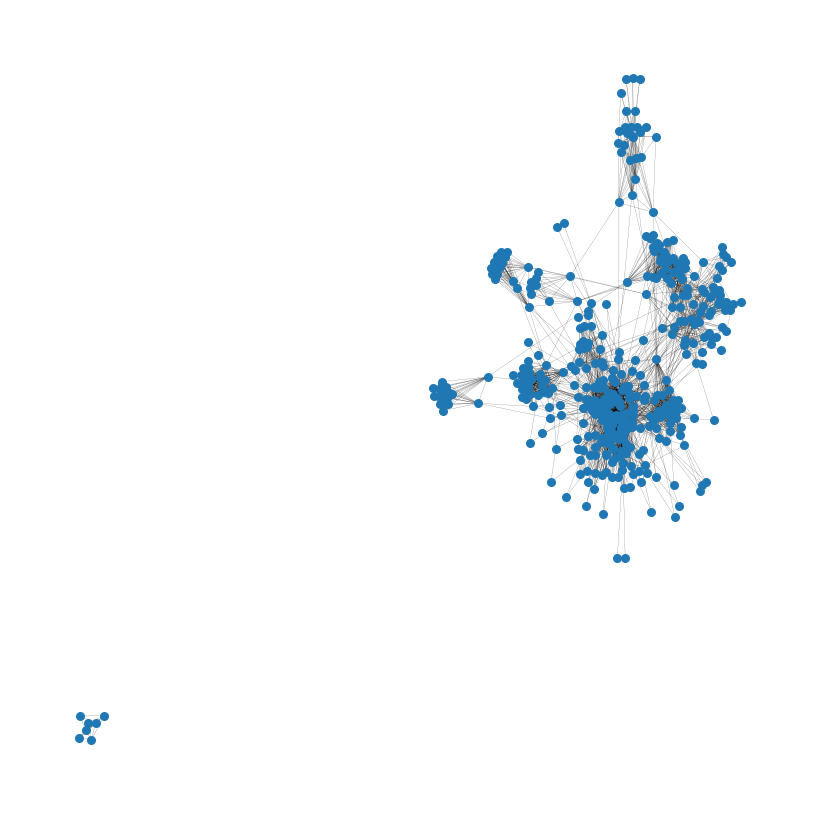

In [165]:
pm1_rxg_hg = hnx.Hypergraph.from_incidence_dataframe(rxg_pm1)

pm1_rxg_hd = pm1_rxg_hg.dual()
l_rxg_pm1 = pm1_rxg_hd.get_linegraph(s = 1)


nx.draw(l_rxg_pm1,node_size = 30, 
        with_labels = False, 
        width = 0.1,
        font_size=5)

In [163]:
df_transposed = rxg_pm1.transpose()

# Initialize a graph
G = nx.Graph()

# Iterate through each row in the transposed DataFrame
for rName, row in df_transposed.iterrows():
    # Get the nodes that are connected in this row
    connected_nodes = [column for column, value in row.items() if value == 1]
    impValue = readScores[list(df_transposed.index).index(rName)]
    # Add edges between the connected nodes
    for i in range(len(connected_nodes)):
        for j in range(i+1, len(connected_nodes)):
            node1 = connected_nodes[i]
            node2 = connected_nodes[j]
            # Increment edge weight if edge already exists, otherwise add the edge with weight 1
            if G.has_edge(node1, node2):
                G[node1][node2]['weight'] += 1*impValue
            else:
                G.add_edge(node1, node2, weight=1*impValue)

# # Print the edges with weights
# for u, v, data in G.edges(data=True):
#     print(f"Node {u} is connected to Node {v} with weight {data['weight']}")

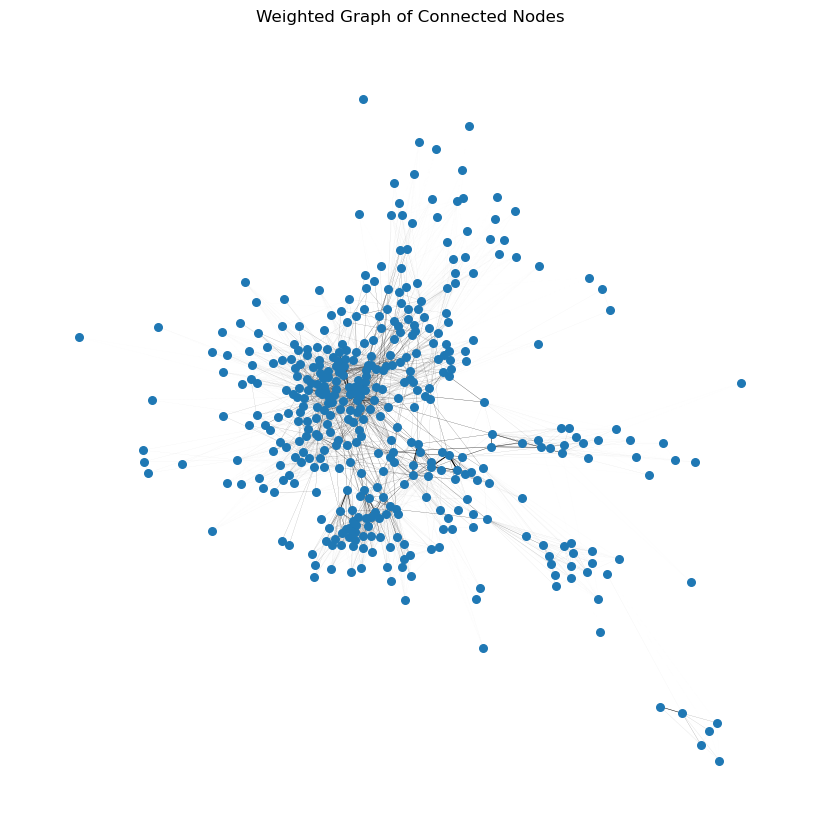

In [164]:
# Get edge weights
edge_weights = [data['weight'] for u, v, data in G.edges(data=True)]
# Normalize edge weights
min_weight = min(edge_weights)
max_weight = max(edge_weights)
normalized_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in edge_weights]

nx.draw(G,node_size = 30, 
        #with_labels = True, 
        #node_color=[color_mapping[node] for node in node_names],
        width = normalized_weights,
        pos = nx.spring_layout(G),
        font_size=5)

plt.title('Weighted Graph of Connected Nodes')
plt.show()

/gpfs/commons/home/ajoglekar/.conda/envs/noush_base/envs/hypergraph_poreC/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


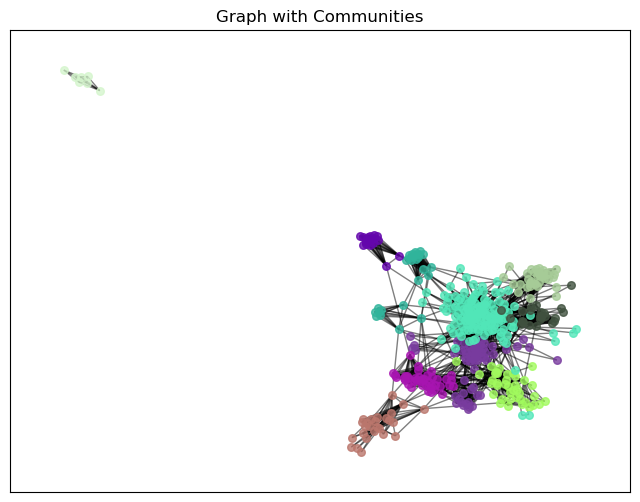

In [166]:
import networkx as nx
import community
import matplotlib.pyplot as plt
import random


# Apply the Louvain method for community detection
partition = community.best_partition(l_rxg_pm1,resolution = 0.8)

# Generate random colors for each community
color_map = {}
for node, community_id in partition.items():
    if community_id not in color_map:
        color_map[community_id] = (random.random(), random.random(), random.random())  # RGB color tuple

# Plot the graph with nodes colored by community
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(l_rxg_pm1)  # Positions of nodes
for community_id, color in color_map.items():
    nodes_in_community = [node for node, cid in partition.items() if cid == community_id]
    nx.draw_networkx_nodes(l_rxg_pm1, pos, nodelist=nodes_in_community, node_color=color, node_size=30, alpha=0.8)
nx.draw_networkx_edges(l_rxg_pm1, pos, alpha=0.5) #width = normalized_weights
plt.title('Graph with Communities')
plt.show()

In [167]:
# Print the communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

print("Communities:")
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

Communities:
Community 6: ['ENSG00000007372', 'ENSG00000049449', 'ENSG00000109911', 'ENSG00000148950', 'ENSG00000170946', 'ENSG00000170959', 'ENSG00000183242', 'ENSG00000184937', 'ENSG00000254584', 'ENSG00000254836', 'ENSG00000255375', 'ENSG00000281880', 'ENSG00000069482', 'ENSG00000168040', 'ENSG00000260877', 'ENSG00000254489', 'ENSG00000254627', 'ENSG00000287373', 'ENSG00000110090', 'ENSG00000162105', 'ENSG00000066382', 'ENSG00000085733', 'ENSG00000110075', 'ENSG00000131620', 'ENSG00000131626', 'ENSG00000132740', 'ENSG00000132749', 'ENSG00000162341', 'ENSG00000172927', 'ENSG00000172935', 'ENSG00000172938', 'ENSG00000197345', 'ENSG00000248844', 'ENSG00000254605', 'ENSG00000255191', 'ENSG00000255606', 'ENSG00000255774', 'ENSG00000255980', 'ENSG00000256508', 'ENSG00000259854', 'ENSG00000260808', 'ENSG00000261070', 'ENSG00000261276', 'ENSG00000261347', 'ENSG00000261625', 'ENSG00000285094', 'ENSG00000172893', 'ENSG00000246889', 'ENSG00000255741', 'ENSG00000171219', 'ENSG00000250508', 'ENS

In [168]:
import pickle as pkl
with open(f'{dataDir}diffAnalysis/diffContactReads_chr11_HCC1954_compGM_communities.pkl','wb') as f:
    pkl.dump(communities,f)

# with open(f'{dataDir}diffAnalysis/diffContactReads_chr11_GM12878_compHCC_communities.pkl','wb') as f:
#     pkl.dump(communities,f)

In [35]:
nuclearSEFile = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/2023_03_06_GM12878_cellularFractionData/v0.evaluateSplicingEfficiency/SE_AvgOverReps_NuclearSE_withStatus'
nucSE = pd.read_csv(nuclearSEFile,sep="\t")


rep1_gex = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/2023_03_06_GM12878_cellularFractionData/GM12878_Nuclear_Rep1/featureCountsOut/GM12878_Nuclear_Rep1.gene.counts.txt'
nucGE = pd.read_csv(rep1_gex,sep="\t")
nucGE.columns =  ["gene_ID","Rep1"]

nucGE['NormRep1'] = [np.log10(item + 1/(10**6)) for item in nucGE['Rep1']]

In [45]:
nucGE.head()

,gene_ID,Rep1,NormRep1
0,ENSG00000243485,1,4.342943e-07
1,ENSG00000237613,0,-6.000000e+00
2,ENSG00000186092,0,-6.000000e+00
3,ENSG00000238009,21,1.322219e+00
4,ENSG00000239945,0,-6.000000e+00


In [174]:
import numpy as np

gmGenes = {}
gmGEX = {}
for community_id, nodes in communities.items():
    seValues = nucSE[nucSE['gene_ID'].isin(nodes)]['Nuclear']
    gmGenes[community_id] = seValues
    gexValues = nucGE[nucGE['gene_ID'].isin(nodes)]['NormRep1']
    gmGEX[community_id] = gexValues

[4, 202, 112, 48, 52, 1, 2, 2, 1]


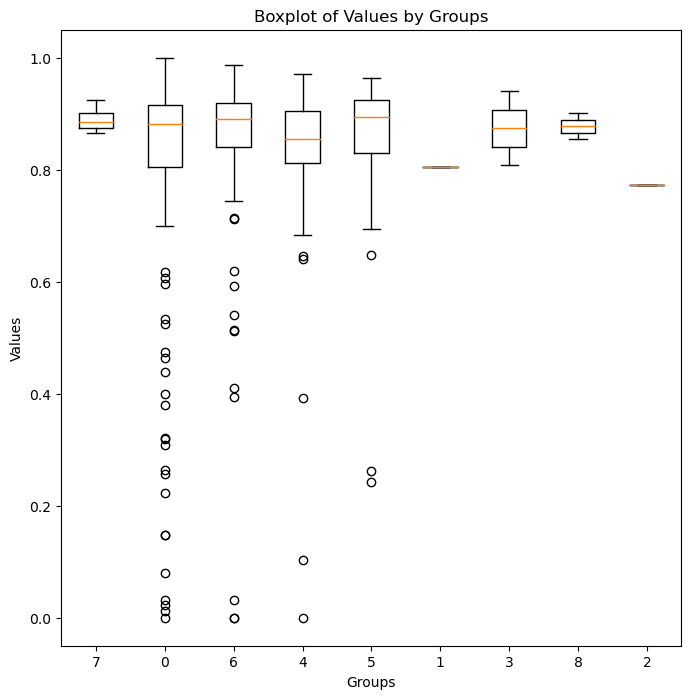

In [175]:
# Convert dictionary to lists for boxplot
data = [values for key, values in gmGenes.items()]
print([len(values) for key,values in gmGenes.items()])

# Create boxplot
plt.boxplot(data)

# Set labels for x-axis
plt.xticks(range(1, len(gmGenes) + 1), gmGenes.keys())
# plt.ylim(0.7,1)

# Set labels for x and y axes
plt.xlabel('Groups')
plt.ylabel('Values')

# Set title
plt.title('Boxplot of Values by Groups')

# Show the plot
plt.show()

[5, 412, 335, 214, 197, 4, 3, 4, 2]


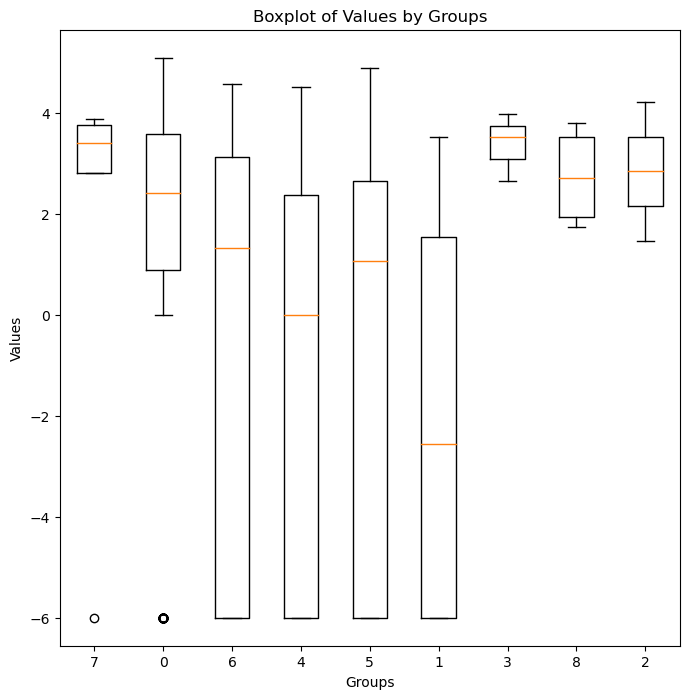

In [176]:
# Convert dictionary to lists for boxplot
data = [values for key, values in gmGEX.items()]
print([len(values) for key,values in gmGEX.items()])

# Create boxplot
plt.boxplot(data)

# Set labels for x-axis
plt.xticks(range(1, len(gmGEX) + 1), gmGEX.keys())

# Set labels for x and y axes
plt.xlabel('Groups')
plt.ylabel('Values')

# Set title
plt.title('Boxplot of Values by Groups')

# Show the plot
plt.show()

In [141]:
nucGE.head()

,gene_ID,Rep1
0,ENSG00000243485,1
1,ENSG00000237613,0
2,ENSG00000186092,0
3,ENSG00000238009,21
4,ENSG00000239945,0


In [ ]:

for community_id, nodes in communities.items():
    sGenes = list(nucSE[nucSE['gene_ID'].isin(nodes)]['gene_ID'])
    eGenes = list(nucGE[nucGE['gene_ID'].isin(nodes)]['gene_ID'])
    commonGenes = list(set(sGenes) & set(eGenes))
    for gene in commonGenes:
        n = nucSE[nucSE['gene_ID'] == gene]['Nuclear']
        e = nucGE[nucGE['gene_ID'] == gene]['Rep1']
    seValues = nucSE[nucSE['gene_ID'].isin(nodes)]['Nuclear']
    gmGenes[community_id] = seValues
    gexValues = nucGE[nucGE['gene_ID'].isin(nodes)]['Rep1']
    gexNorm = [np.log10(item + 1/(10**6)) for item in gexValues]
    gmGEX[community_id] = gexNorm

In [129]:
x = np.array([1,3,5,7,8,9, 10, 15])
y = np.array([10, 20, 30, 40, 50, 60, 70, 80])
np.corrcoef(x,y)

array([[1.        , 0.97489441],
       [0.97489441, 1.        ]])

In [92]:
hg_genes_se = nucSE[nucSE['gene_ID'].isin(clust_hg)]['Nuclear']

,gene_ID,SE_var,Cytosolic,Nuclear,WholeCell,nucStatus
0,ENSG00000000419,0.001063,0.943271,0.891642,0.951967,High
1,ENSG00000000457,0.017272,0.897960,0.640562,0.815354,Medium
2,ENSG00000000460,0.000561,0.955136,0.907759,0.931873,High
3,ENSG00000000938,0.001399,0.922836,0.848781,0.894995,High
4,ENSG00000001036,0.010581,0.928505,0.731498,0.881335,Medium
...,...,...,...,...,...,...
11309,ENSG00000287839,NaN,NaN,0.913043,NaN,High
11310,ENSG00000287892,NaN,NaN,0.004975,NaN,Low
11311,ENSG00000287895,0.000620,0.831240,0.799134,0.782206,High
11312,ENSG00000287920,0.001463,NaN,0.176675,0.230769,Low


In [53]:
clust_hg = list(set(chrFile_wBinID[chrFile_wBinID['ID'].isin(impReads_pm2)]['geneID']))
print(len(clust_hg))

610


In [233]:
clust_hg

['ENSG00000272343',
 'ENSG00000164736',
 'ENSG00000164687',
 'ENSG00000215262',
 'ENSG00000047249',
 'ENSG00000133742',
 'ENSG00000253238',
 'ENSG00000254380',
 'ENSG00000164893',
 'ENSG00000287654',
 'ENSG00000008988',
 'ENSG00000180543',
 'ENSG00000174417',
 'ENSG00000253369',
 'ENSG00000253669',
 'ENSG00000272138',
 'ENSG00000260955',
 'ENSG00000254081',
 'ENSG00000083307',
 'ENSG00000120992',
 'ENSG00000121022',
 'ENSG00000169439',
 'ENSG00000155090',
 'ENSG00000286766',
 'ENSG00000178125',
 'ENSG00000164764',
 'ENSG00000164749',
 'ENSG00000253477',
 'ENSG00000198846',
 'ENSG00000165084',
 'ENSG00000172817',
 'ENSG00000253553',
 'ENSG00000253773',
 'ENSG00000164796',
 'ENSG00000197140',
 'ENSG00000076641',
 'ENSG00000147614',
 'ENSG00000253583',
 'ENSG00000254349',
 'ENSG00000253642',
 'ENSG00000214954',
 'ENSG00000186106',
 'ENSG00000280725',
 'ENSG00000253778',
 'ENSG00000104331',
 'ENSG00000137547',
 'ENSG00000155097',
 'ENSG00000254001',
 'ENSG00000205038',
 'ENSG00000147408',
